# Analysis of Accidents Reported on Twitter 
### By **Néstor Suat** in 2021

**Descripción:** Explorando los datos recolectados en twitter sobre reportes de accidentes

### Librerías

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

from shapely.geometry import Point
import adjustText as aT
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Funciones

In [3]:
def load_data(dirname, filename):
    dataset = pd.read_csv(dir_+file, delimiter = "\t", quoting = 3)
    print("Loaded dataset form: ", dataset.shape)
    return dataset

def selected_data(dataset, init=None, end=None):
    if init != None and end != None:
        dataset = dataset[(dataset['created_at'] >= init) & (dataset['created_at'] < end)] # Twitter
        #dataset = dataset[(dataset['FECHA_HORA_ACC'] >= init) & (dataset['FECHA_HORA_ACC'] < end)] # Oficial
    print("Selected dataset (",init,"-",end,") shape: ", dataset.shape)
    return dataset



def geopandas_create(dataset):
    points = dataset.apply(
        lambda srs: Point(float(srs['lon']), float(srs['lat'])),
        axis='columns'
    )
    gpd_dataset = gpd.GeoDataFrame(dataset, geometry=points)
    return gpd_dataset

def geoplot_accidents(shapefile, gpd_dataset, title=None, subtitle=None, fig_size=(12,12), alpha=1, export_name='test.png'):
    ax = gplt.polyplot(shapefile,projection=gcrs.PlateCarree(),facecolor='lightgray', figsize=fig_size)
    gplt.pointplot(gpd_dataset, edgecolor='lightgray', linewidth=0.5, alpha=alpha, ax=ax)

    ax.gridlines(draw_labels=True)
    ax.set_xlabel('lon')
    ax.set_ylabel('lat');
    #### X axis
    ax.text(-0.09, 0.55, 'latitude', va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',fontsize='x-large',
            transform=ax.transAxes)
    #### Y axis
    ax.text(0.5, -0.07,'longitude', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',fontsize='x-large',
            transform=ax.transAxes)
    #### Title
    if title != None:
        ax.text(0.5, 1.1, title, va='top', ha='center',
                rotation='horizontal', rotation_mode='anchor', fontsize='xx-large',
                transform=ax.transAxes)
    #### Subtitle
    if subtitle != None:
        ax.text(0.5, 1.06, subtitle, va='top', ha='center',
                rotation='horizontal', rotation_mode='anchor', fontsize='x-large',
                transform=ax.transAxes)
    fig = ax.get_figure()
    fig.savefig(export_name)
    
def kdeplot_accidents(shapefile, poly_points, gpd_dataset, title=None, subtitle=None, fig_size=(12,12), export_name='test.png'):
    ax = gplt.kdeplot(
        gpd_dataset, 
        cmap='flare_r', 
        shade=True, 
        shade_lowest=True, 
        clip=shapefile, 
        #kernel="epanechnikov",
        #bw_method='scott',
        #bw_adjust=1,
        #levels=20,
        cbar=True,
        #projection=gcrs.PlateCarree(),
        figsize=fig_size
    )

    gplt.polyplot(shapefile, ax=ax,zorder=1)

    ax.text(-0.01, 0.55, 'latitude', va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',fontsize='x-large',
            transform=ax.transAxes)
    ax.text(0.5, -0.01,'longitude', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',fontsize='x-large',
            transform=ax.transAxes)
    if title != None:
        ax.text(0.5, 1.01, title, va='top', ha='center',
                rotation='horizontal', rotation_mode='anchor', fontsize='xx-large',
                transform=ax.transAxes)
    if subtitle != None:
        ax.text(0.5, 0.97, subtitle, va='top', ha='center',
                rotation='horizontal', rotation_mode='anchor', fontsize='x-large',
                transform=ax.transAxes)

    texts = []
    for x, y, label in zip(poly_points.geometry.x, poly_points.geometry.y, poly_points["LocNombre"]):
        texts.append(plt.text(x, y, label, fontsize = 8))

    aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1))
    
    fig = ax.get_figure()
    fig.savefig(export_name, dpi=300)

## Data

In [9]:
# Twitter
dir_ = "../../data/database/output_ml/M1/NER_extractor/"
#file = 'accident_tweets_lat_lon_geocord_bogota.tsv'
images = "images/twitter/"
file = 'accident_tweets_lat_lon_geocord_bogota_unique_keywords.tsv'
#images = "images/twitter_unique_keywords_individual_users/"

#accident_tweets_lat_lon_geocord_bogota_unique.tsv
#

# Oficial data
#dir_ = "../../data/database/"
#file = 'historico_oficial_accidentes_bogota.tsv'
#images = "images/oficial/"

dataset = load_data(dir_, file)
localidades = gpd.read_file('maps/shp2/loca-urb.shp')

localidades['center'] = localidades['geometry'].centroid
loc_points = localidades.copy()
loc_points.set_geometry('center',inplace = True)

Loaded dataset form:  (26362, 32)


In [5]:
dataset = dataset[dataset['user_name'] != 'BogotaTransito']
dataset

KeyError: 'user_name'

## Historico

In [10]:
accidentes = selected_data(dataset) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( None - None ) shape:  (26362, 32)


In [11]:
accidentes

,_id,api,coordinates,created_at,created_at_str,favorite_count,geo,id_tweet,place_coordinates,place_country,...,user_verified,label,clean,entities,location,address_normalization,dataset,lat,lon,geometry
0,5bff72a0554e478dfcc66c80,Search,{},2018-11-28 05:38:32,2018-11-28 10:38:32,0,{},1067729446277431303,{},NaN,...,False,1,citytv grave accidente en la 10 con primera de...,"[('10 con primera de mayo', 'loc')]",10 con primera de mayo,BOGOTA 10 PRIMERA DE MAYO,2_server_token_search,4.582700,-74.102579,POINT (-74.10258 4.58270)
1,5d15eb53dc5d3f67866703ea,Stream-follow,{},2019-06-28 05:26:22,2019-06-28 10:26:22,0,{},1144552615218466817,{},NaN,...,False,1,sectormovilidad bocarejo _jp bogota transitobt...,"[('106', 'loc'), ('auntopista', 'loc'), ('carr...",106 auntopista carrera 19,BOGOTA 106 AUNTOPISTA AVENIDA CARRERA 19,4_server_follow_timeline_user,4.694599,-74.055887,POINT (-74.05589 4.69460)
2,5ce629370ae705ecd81f6d74,Search,{},2019-05-22 08:02:07,2019-05-22 13:02:07,1,{},1131183457516834817,{},NaN,...,False,1,BD Se solicita asistencia de Transito a la alt...,"[('11a este x calle 64 sur', 'loc')]",11a este x calle 64 sur,BOGOTA 11 ESTE CALLE 64 SUR,2_server_token_search,4.562396,-74.143814,POINT (-74.14381 4.56240)
3,5d0e6038dc5d3f02de9a16b4,Stream-follow,{},2019-06-22 12:06:58,2019-06-22 17:06:58,0,{},1142479102286471169,{},NaN,...,False,1,bogotatransito bogotatransito sectormovilidad ...,"[('11.00am de hoy', 'loc'), ('cra 9', 'loc')]",11.00am de hoy cra 9,BOGOTA 11.00 AM DE HOY AVENIDA CARRERA 9,4_server_follow_timeline_user,4.693273,-74.034641,POINT (-74.03464 4.69327)
4,5c479ff4dc5d3f7fc000c69c,Stream-follow,{},2019-01-22 17:57:51,2019-01-22 22:57:51,0,{},1087846833953669120,{},NaN,...,False,1,bogotatransito moto se paso en rojo y atropell...,"[('116 con 19 pepe sierra', 'loc')]",116 con 19 pepe sierra,BOGOTA 116 19 AVENIDA PEPE SIERRA,4_server_follow_timeline_user,4.697757,-74.053778,POINT (-74.05378 4.69776)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26357,5bcf860ddc5d3f24fad639ad,Stream-follow,{},2018-10-23 15:35:25,2018-10-23 20:35:25,0,{},1054833693569769473,{},NaN,...,False,1,bogotatransito sectormovilidad transitobta Hay...,"[('Villa del prado', 'loc'), ('autopista norte...",Villa del prado autopista norte con calle 171,BOGOTA VILLA DEL PRADO AUTOPISTA NORTE CALLE 171,4_server_follow_timeline_user,4.754382,-74.053420,POINT (-74.05342 4.75438)
26358,5c4f863cdc5d3f746b96b0f0,Stream-follow,{},2019-01-28 17:46:15,2019-01-28 22:46:15,0,{},1090018242293313536,{},NaN,...,False,1,"citytv grave accidente en Villa Gloria, Ciudad...","[('Villa Gloria', 'loc'), ('Ciudad Bolivar', '...",Villa Gloria Ciudad Bolivar,BOGOTA VILLA GLORIA LOCALIDAD DE CIUDAD BOLIVAR,4_server_follow_timeline_user,4.551757,-74.150808,POINT (-74.15081 4.55176)
26359,5c512f990ae705ecd81d6df4,Search,{},2019-01-29 01:00:16,2019-01-29 06:00:16,0,{},1090127467212353542,{},NaN,...,True,1,Una falla mecánica habría provocado un aparato...,"[('Villa Gloria', 'loc'), ('Ciudad Bolívar', '...",Villa Gloria Ciudad Bolívar,BOGOTA VILLA GLORIA LOCALIDAD DE CIUDAD BOLIVAR,2_server_token_search,4.551757,-74.150808,POINT (-74.15081 4.55176)
26360,5c917486dc5d3f095834dc7e,Stream-follow,{},2019-03-19 18:00:17,2019-03-19 23:00:17,0,{},1108141168754331649,{},NaN,...,False,1,transmilenio policia colombia vozpopuli jorge ...,"[('virrey', 'loc'), ('estacion calle 85', 'loc')]",virrey estacion calle 85,BOGOTA VIRREY ESTACION DE TRANSMILENIO AVENIDA...,4_server_follow_timeline_user,4.672916,-74.061915,POINT (-74.06192 4.67292)


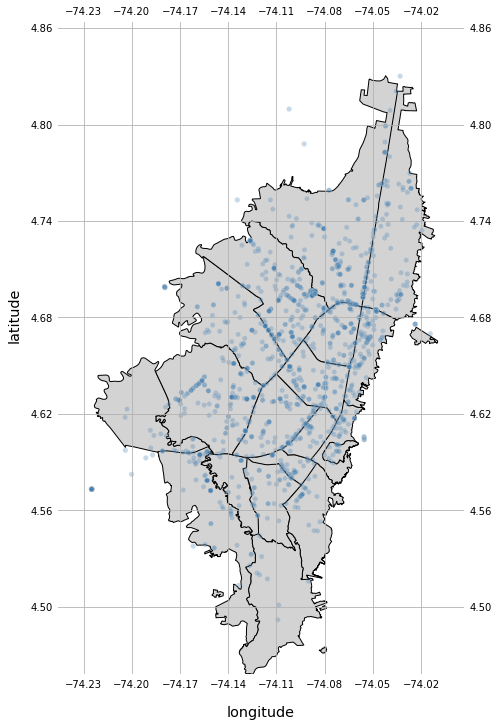

In [8]:
#title = 'Twitter Report of Traffic Accidents in  Bogotá'
#subtitle = 'October 2018 to July 2019'
export_name = images+'historico.png'
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, fig_size=(12,12), alpha=.3, export_name=export_name)

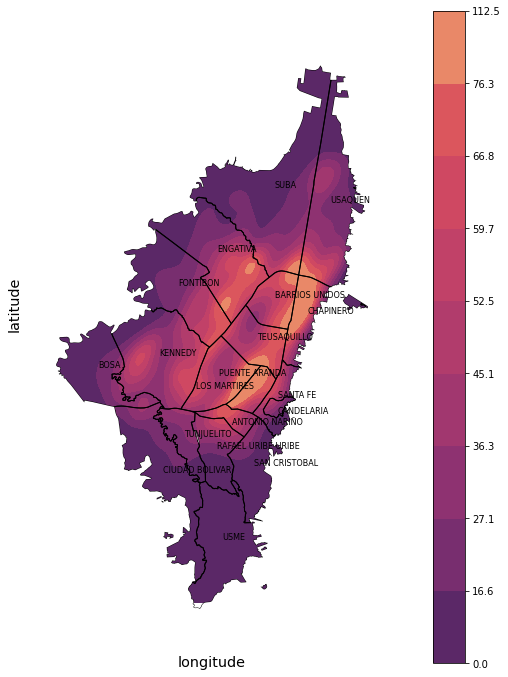

In [13]:
#title = 'Intensity estimated using the Kernel method'
#subtitle = 'October 2018 to July 2019'
export_name = images+'kde_v2.png'
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, fig_size=(12,12), export_name=export_name)

# Octubre 2018

In [8]:
start_date = '2018-10-01'
final_date = '2018-11-01'
mes = 'october'
anio = '2018'
subtitle = mes.capitalize()+' '+anio


export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2018-10-01 - 2018-11-01 ) shape:  (2194, 33)


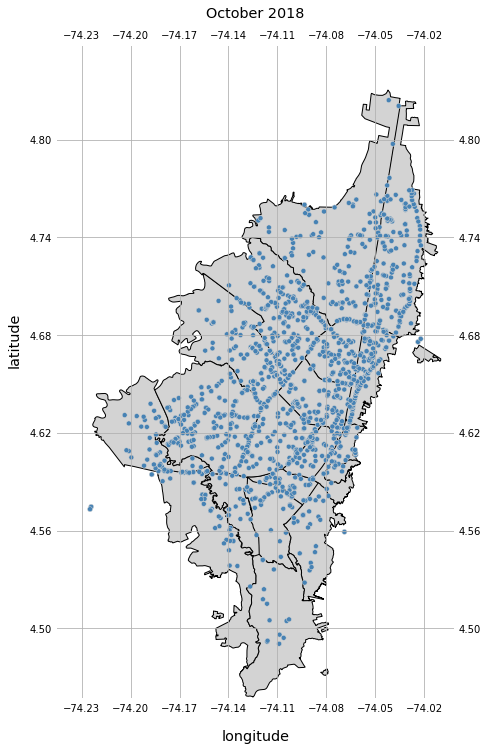

In [9]:
#geoplot_accidents(localidades, gpd_accidentes, title_1, subtitle, (12,12), 1, export_name_1)
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

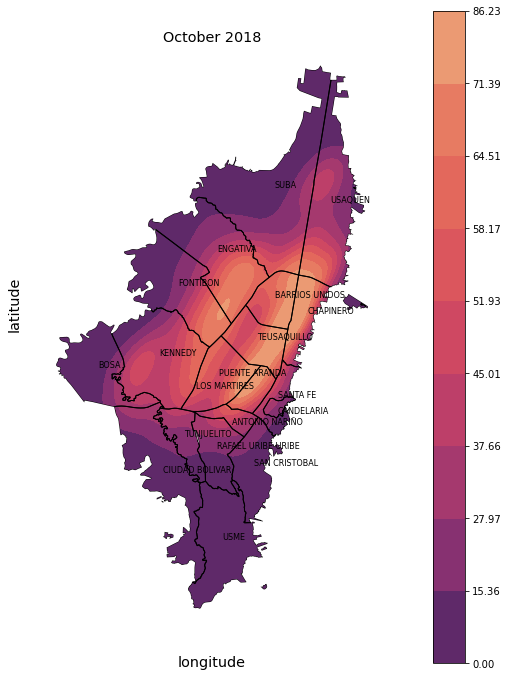

In [10]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)

# Noviembre

In [11]:
start_date = '2018-11-01'
final_date = '2018-12-01'
mes = 'november'
anio = '2018'

####################

subtitle = mes.capitalize()+' '+anio
export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2018-11-01 - 2018-12-01 ) shape:  (2358, 33)


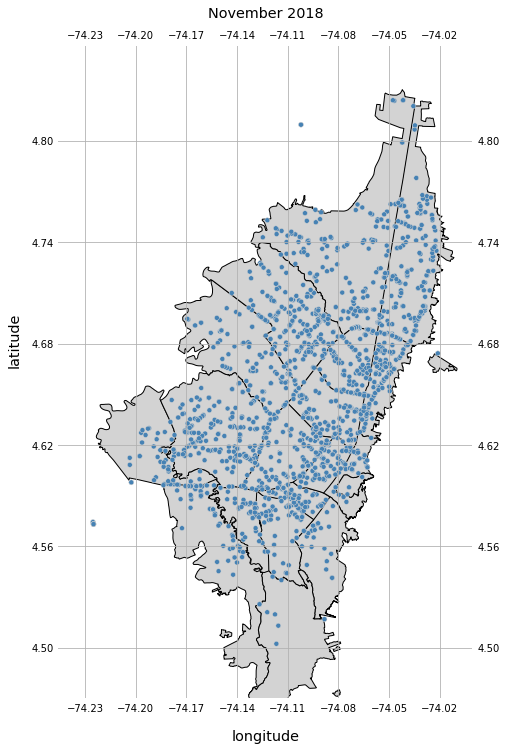

In [12]:
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

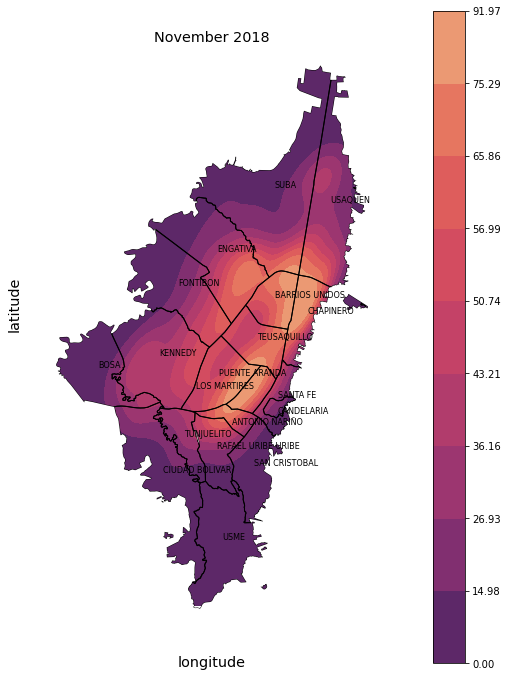

In [13]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)

# Dicembre

In [14]:
start_date = '2018-12-01'
final_date = '2019-01-01'
mes = 'december'
anio = '2018'

####################

subtitle = mes.capitalize()+' '+anio
export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2018-12-01 - 2019-01-01 ) shape:  (2114, 33)


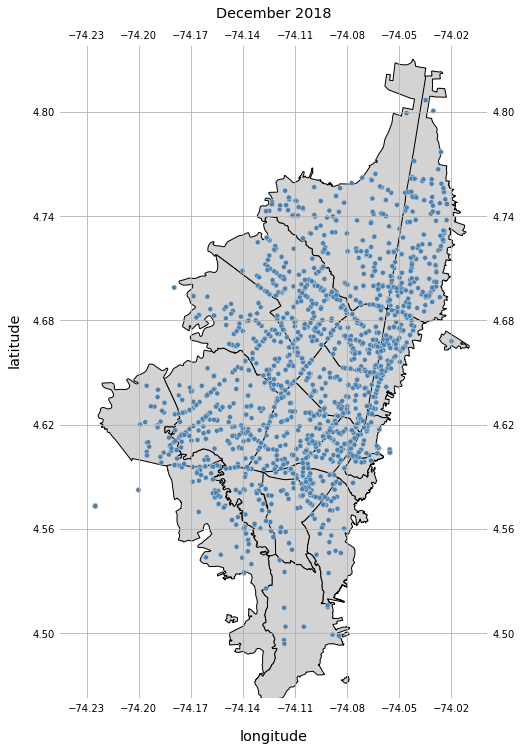

In [15]:
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

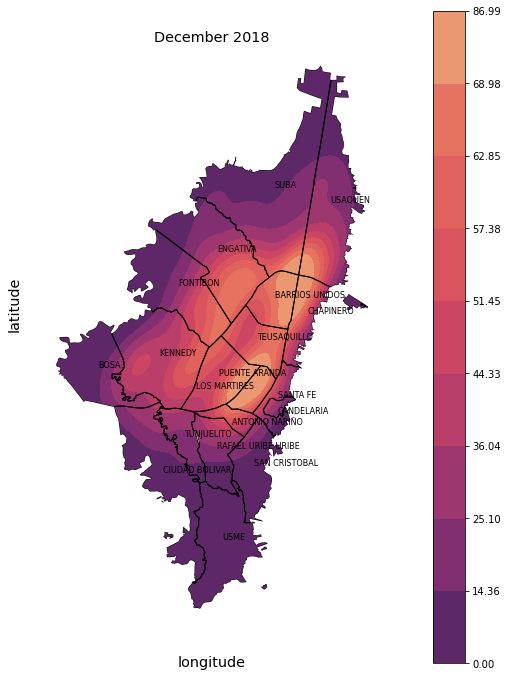

In [16]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)

# Enero 2019

In [17]:
start_date = '2019-01-01'
final_date = '2019-02-01'
mes = 'january'
anio = '2019'

####################

subtitle = mes.capitalize()+' '+anio
export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2019-01-01 - 2019-02-01 ) shape:  (2692, 33)


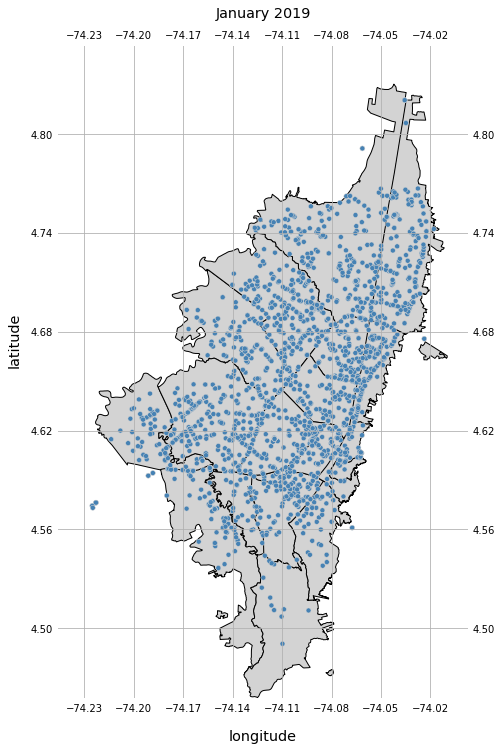

In [18]:
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

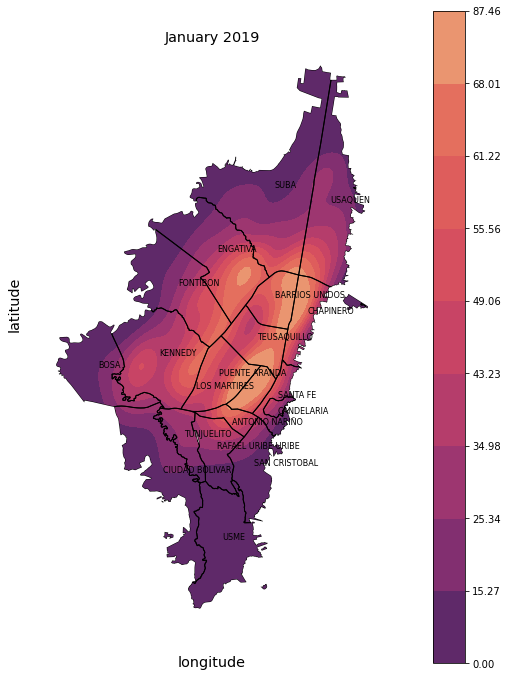

In [19]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)

# Febrero 2019

In [20]:
start_date = '2019-02-01'
final_date = '2019-03-01'
mes = 'february'
anio = '2019'

####################

subtitle = mes.capitalize()+' '+anio
export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2019-02-01 - 2019-03-01 ) shape:  (2534, 33)


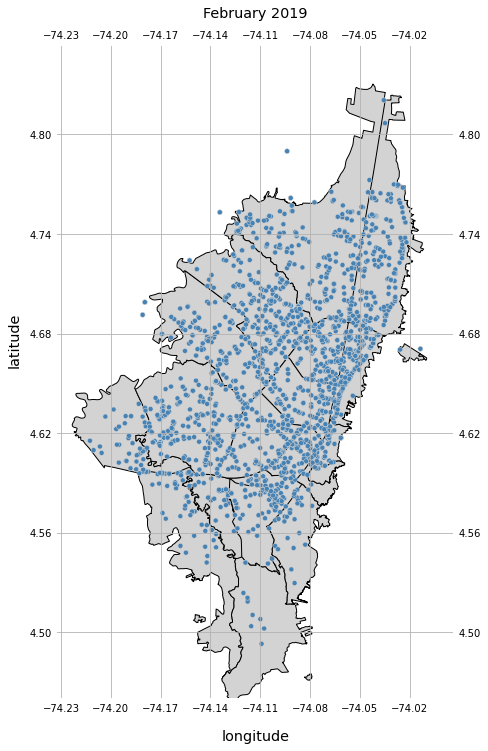

In [21]:
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

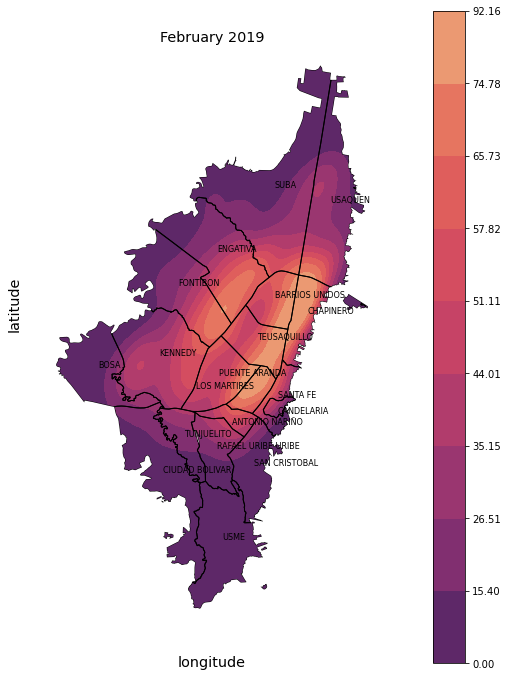

In [22]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)

# Marzo 2019

In [23]:
start_date = '2019-03-01'
final_date = '2019-04-01'
mes = 'march'
anio = '2019'

####################

subtitle = mes.capitalize()+' '+anio
export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2019-03-01 - 2019-04-01 ) shape:  (2500, 33)


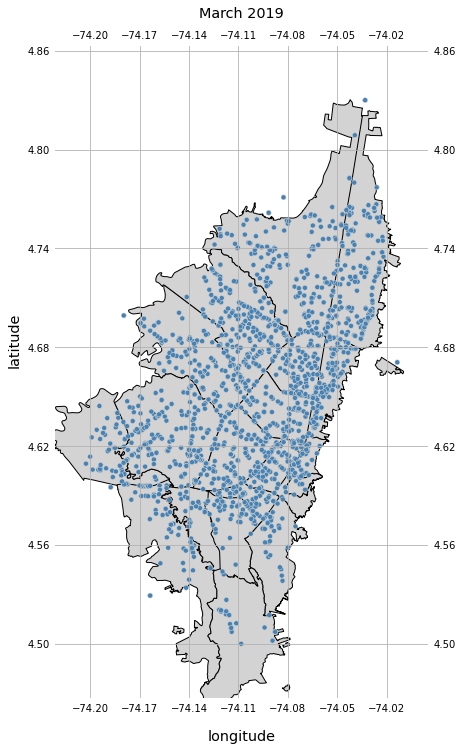

In [24]:
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

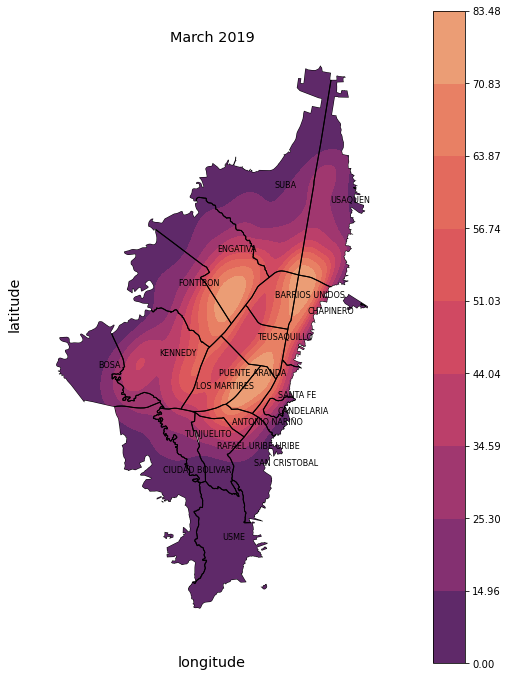

In [25]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)

# Abril 2019

In [26]:
start_date = '2019-04-01'
final_date = '2019-05-01'
mes = 'april'
anio = '2019'

####################

subtitle = mes.capitalize()+' '+anio
export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2019-04-01 - 2019-05-01 ) shape:  (2241, 33)


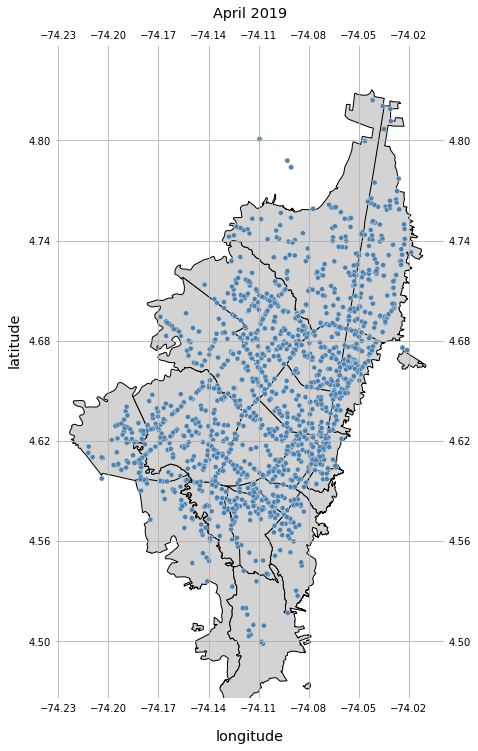

In [27]:
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

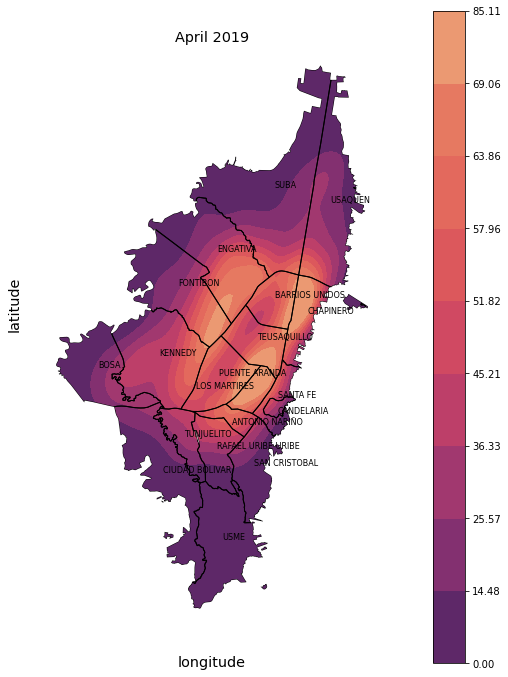

In [28]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)

# Mayo 2019

In [29]:
start_date = '2019-05-01'
final_date = '2019-06-01'
mes = 'may'
anio = '2019'

####################

subtitle = mes.capitalize()+' '+anio
export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2019-05-01 - 2019-06-01 ) shape:  (2545, 33)


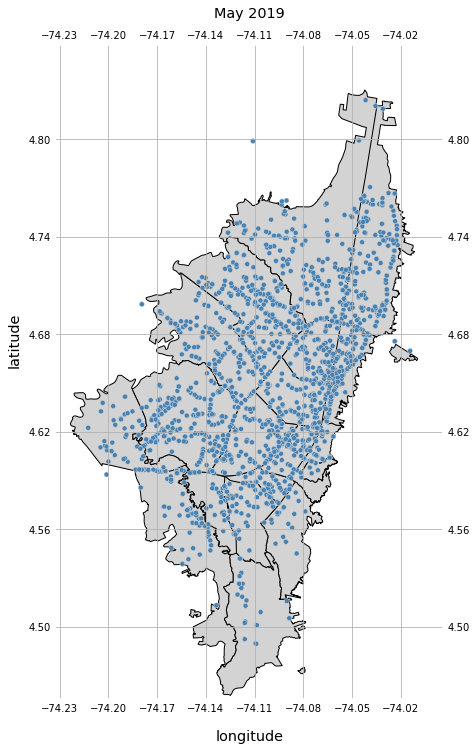

In [30]:
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

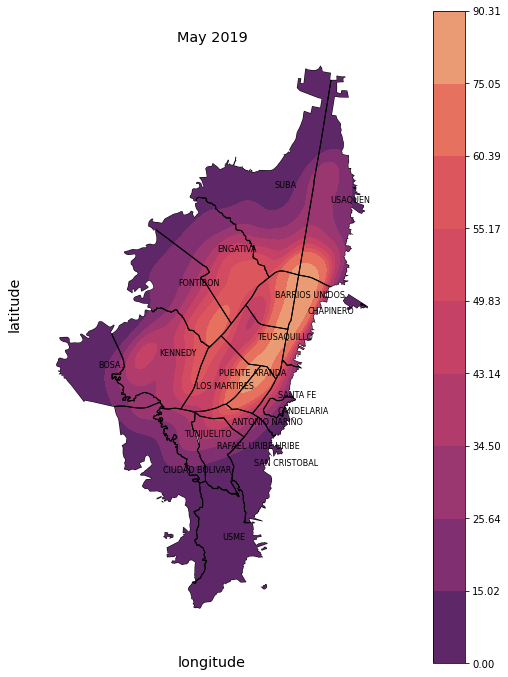

In [31]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)

# Junio 2019

In [32]:
start_date = '2019-06-01'
final_date = '2019-07-01'
mes = 'june'
anio = '2019'

####################

subtitle = mes.capitalize()+' '+anio
export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2019-06-01 - 2019-07-01 ) shape:  (3287, 33)


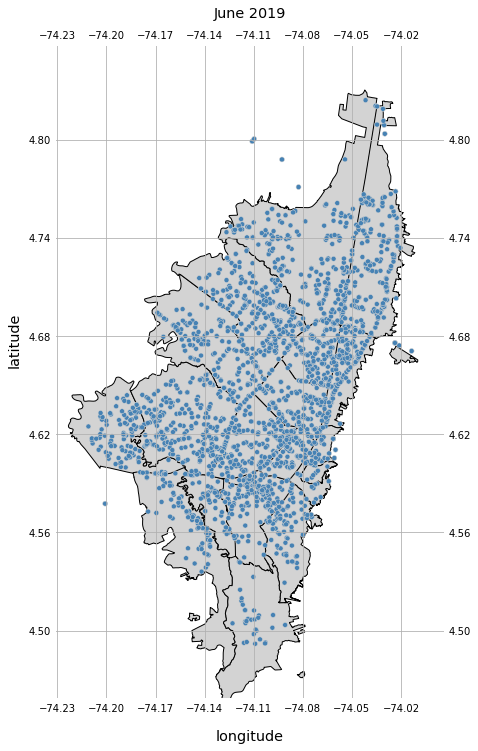

In [33]:
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

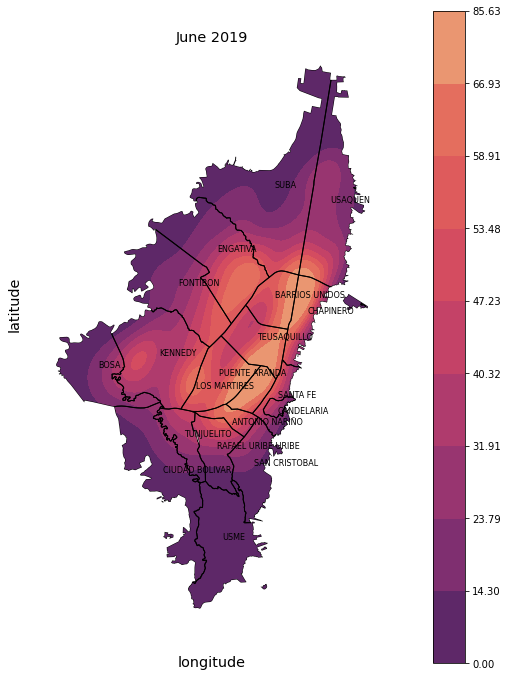

In [34]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)

# Julio 2019

In [35]:
start_date = '2019-07-01'
final_date = '2019-08-01'
mes = 'july'
anio = '2019'

####################

subtitle = mes.capitalize()+' '+anio
export_name_1 = images+'historico_'+mes+'.png'
export_name_2 = images+'kde_'+mes+'.png'

title_1 = 'Twitter Report of Traffic Accidents in  Bogotá'
title_2 = 'Intensity estimated using the Kernel method'

accidentes = selected_data(dataset, start_date, final_date) #Seleccionando octubre
gpd_accidentes = geopandas_create(accidentes)

Selected dataset ( 2019-07-01 - 2019-08-01 ) shape:  (3897, 33)


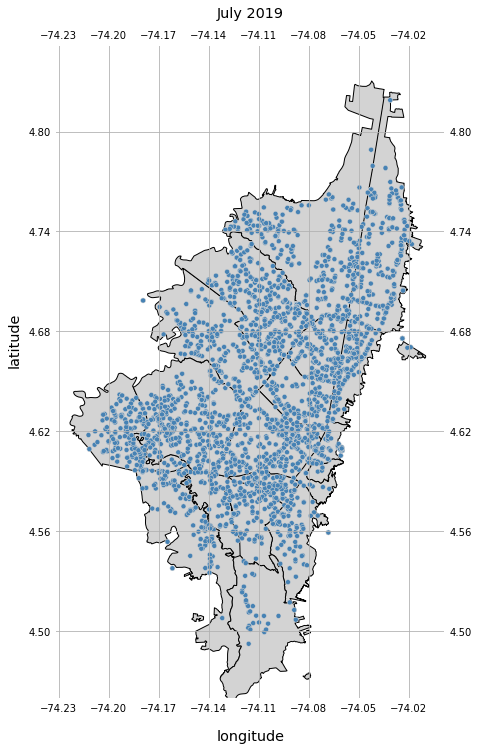

In [36]:
geoplot_accidents(shapefile=localidades, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), alpha=1, export_name=export_name_1)

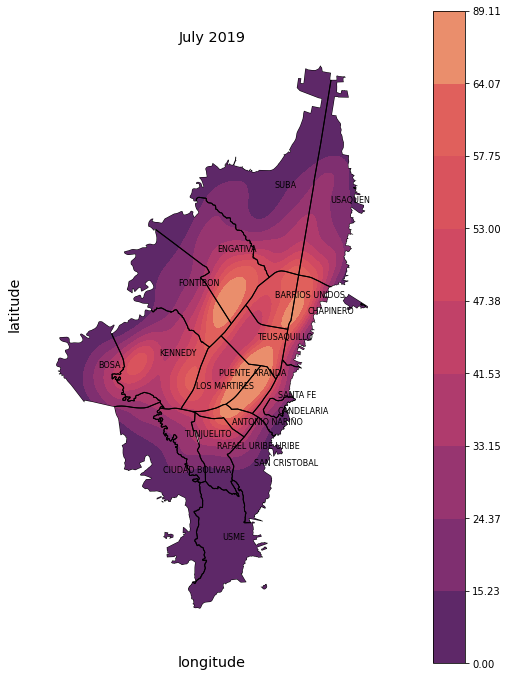

In [37]:
kdeplot_accidents(shapefile=localidades, poly_points=loc_points, gpd_dataset=gpd_accidentes, subtitle=subtitle, fig_size=(12,12), export_name=export_name_2)